In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from models.classifiers import DLM

# xor

In [3]:
x = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]).T

tmp = np.array([0, 1, 1, 0])
y = np.zeros((tmp.size, tmp.max() + 1))
y[np.arange(tmp.size), tmp] = 1
y = y.T
del tmp

In [4]:
x

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [5]:
y

array([[1., 0., 0., 1.],
       [0., 1., 1., 0.]])

In [6]:
sizes = [2, 10, 2]
epochs = 1000
lr = 0.5

In [7]:
model = DLM(sizes=sizes, epochs=epochs, lr=lr)

In [8]:
model.train(x, y)

accuracy[0]: 0.5
accuracy[1]: 0.5
accuracy[2]: 0.5
accuracy[3]: 0.5
accuracy[4]: 0.5
accuracy[5]: 0.5
accuracy[6]: 0.5
accuracy[7]: 0.5
accuracy[8]: 0.5
accuracy[9]: 0.5
accuracy[10]: 0.5
accuracy[11]: 0.5
accuracy[12]: 0.5
accuracy[13]: 0.5
accuracy[14]: 0.5
accuracy[15]: 0.5
accuracy[16]: 0.5
accuracy[17]: 0.5
accuracy[18]: 0.5
accuracy[19]: 0.5
accuracy[20]: 0.5
accuracy[21]: 0.5
accuracy[22]: 0.5
accuracy[23]: 0.5
accuracy[24]: 0.5
accuracy[25]: 0.5
accuracy[26]: 0.5
accuracy[27]: 0.5
accuracy[28]: 0.5
accuracy[29]: 0.5
accuracy[30]: 0.75
accuracy[31]: 0.75
accuracy[32]: 0.75
accuracy[33]: 0.75
accuracy[34]: 0.75
accuracy[35]: 0.75
accuracy[36]: 0.75
accuracy[37]: 0.75
accuracy[38]: 0.75
accuracy[39]: 0.75
accuracy[40]: 0.75
accuracy[41]: 0.75
accuracy[42]: 0.75
accuracy[43]: 0.75
accuracy[44]: 0.75
accuracy[45]: 0.75
accuracy[46]: 0.75
accuracy[47]: 0.75
accuracy[48]: 0.75
accuracy[49]: 0.75
accuracy[50]: 0.75
accuracy[51]: 0.75
accuracy[52]: 0.75
accuracy[53]: 0.75
accuracy[54]: 

1.0

# penguins dataset

In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import math

from utils.preprocessing import  label_encode
from utils.activition_functions import  linear
from utils.visualization import visualize_features, plot_decesion_boundary
from models.classifiers import Adaline
from utils.metrices import  accuracy

In [4]:
df = pd.read_csv('../data/penguins.csv')
df.tail()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
145,Chinstrap,50.8,18.5,201,male,4450
146,Chinstrap,50.1,17.9,190,female,3400
147,Chinstrap,49.0,19.6,212,male,4300
148,Chinstrap,51.5,18.7,187,male,3250
149,Chinstrap,49.8,17.3,198,female,3675


In [5]:
df['species'] = label_encode(df['species'])

In [6]:
df['gender'] = label_encode(df['gender'])
df['gender'][df['gender'] == -1] = df['gender'].max()
df['gender'].describe()

/tmp/ipykernel_23919/736352639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][df['gender'] == -1] = df['gender'].max()


count    150.000000
mean       0.520000
std        0.501274
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gender, dtype: float64

In [7]:
scaler = MinMaxScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

/tmp/ipykernel_23919/695404667.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,0,0.196078,0.666667,0.155172,1.0,0.291667
1,0,0.211765,0.511905,0.241379,0.0,0.305556
2,0,0.243137,0.583333,0.396552,0.0,0.152778
3,0,0.215686,0.547619,0.241379,0.0,0.222222
4,0,0.101961,0.738095,0.362069,0.0,0.208333
...,...,...,...,...,...,...
145,1,0.654902,0.642857,0.500000,1.0,0.486111
146,1,0.627451,0.571429,0.310345,0.0,0.194444
147,1,0.584314,0.773810,0.689655,1.0,0.444444
148,1,0.682353,0.666667,0.258621,1.0,0.152778


In [30]:
labels = df.iloc[:,0].to_numpy()
tmp = np.zeros((labels.size, labels.max() + 1))
tmp[np.arange(labels.size), labels] = 1
labels = tmp
labels.shape

(150, 3)

In [31]:
features = df.iloc[:,1:].to_numpy()
features.shape

(150, 5)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [49]:
model = DLM(sizes=[5, 10, 3], epochs=1000, lr=0.01)

In [50]:
train_accuracy = model.train(x_train.T, y_train.T)
f'train accuracy: {train_accuracy}'

accuracy[0]: 0.3523809523809524
accuracy[1]: 0.3523809523809524
accuracy[2]: 0.3523809523809524
accuracy[3]: 0.3523809523809524
accuracy[4]: 0.3523809523809524
accuracy[5]: 0.3523809523809524
accuracy[6]: 0.3523809523809524
accuracy[7]: 0.3523809523809524
accuracy[8]: 0.3523809523809524
accuracy[9]: 0.3523809523809524
accuracy[10]: 0.3523809523809524
accuracy[11]: 0.3523809523809524
accuracy[12]: 0.3523809523809524
accuracy[13]: 0.3523809523809524
accuracy[14]: 0.3523809523809524
accuracy[15]: 0.3523809523809524
accuracy[16]: 0.3523809523809524
accuracy[17]: 0.3523809523809524
accuracy[18]: 0.3523809523809524
accuracy[19]: 0.3523809523809524
accuracy[20]: 0.3523809523809524
accuracy[21]: 0.3523809523809524
accuracy[22]: 0.3523809523809524
accuracy[23]: 0.3523809523809524
accuracy[24]: 0.3523809523809524
accuracy[25]: 0.3619047619047619
accuracy[26]: 0.42857142857142855
accuracy[27]: 0.44761904761904764
accuracy[28]: 0.42857142857142855
accuracy[29]: 0.41904761904761906
accuracy[30]: 0.

'train accuracy: 1.0'

In [53]:
y_pred = model.predict(x_test.T)
f'test accuracy: {DLM.caclutate_accuracy(y_pred.T, y_test.T)}'

'test accuracy: 1.0'

# mnist dataset

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

2022-12-02 13:14:57.989600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 13:14:58.077037: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-02 13:14:58.077060: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-02 13:14:58.806160: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

## load data

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

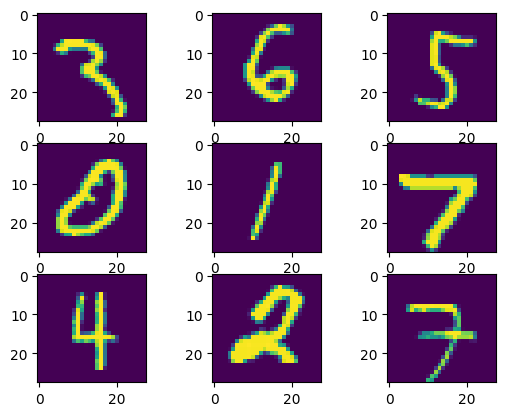

In [11]:
fig, axs = plt.subplots(3, 3)
for y in range(3):
    for x in range(3):
        axs[y, x].imshow(x_train[np.random.randint(x_train.shape[0])])

In [12]:
def one_hot_encode(array):
    tmp = np.zeros((array.size, array.max() + 1))
    tmp[np.arange(array.size), array] = 1
    return tmp

In [13]:
x_train.shape = (x_train.shape[0], x_train[0].size)
x_test.shape = (x_test.shape[0], x_test[0].size)
y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

In [14]:
print(f'x_train.shape: {x_train.shape}')
print(f'x_test.shape: {x_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

x_train.shape: (60000, 784)
x_test.shape: (10000, 784)
y_train.shape: (60000, 10)
y_test.shape: (10000, 10)


In [15]:
sizes = [x_train[0].size, 10, y_train[0].size]
epochs = 1000
lr = 0.5

In [16]:
print(f'sizes: {sizes}')
print(f'epochs: {epochs}')
print(f'lr: {lr}')

sizes: [784, 10, 10]
epochs: 1000
lr: 0.5


In [17]:
params = params_init()

NameError: name 'params_init' is not defined

In [ ]:
train(x_train.T, y_train.T)